# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

# Data pre-processing and main info

In [ ]:
# Define the path to the CSV file. Make sure this path is correct if your file is in a different location.
file_path = '/content/KAG_conversion_data.csv'

# Read the CSV file into a pandas DataFrame.
try:
    df = pd.read_csv(file_path)

    # Display the first 5 rows of the DataFrame to get a quick look at the data structure and content.
    print("First 5 rows of the DataFrame:")
    display(df.head())

    # Display information about the DataFrame, including the index dtype and column dtypes, non-null values and memory usage.
    print("\nDataFrame information:")
    display(df.info())

except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

## Loading the data and general info

In [ ]:
# Define the path to the CSV file. Make sure this path is correct if your file is in a different location.
file_path = '/content/KAG_conversion_data.csv'

# Read the CSV file into a pandas DataFrame.
try:
    df = pd.read_csv(file_path)

    # Display the first 5 rows of the DataFrame to get a quick look at the data structure and content.
    print("First 5 rows of the DataFrame:")
    display(df.head())

    # Display information about the DataFrame, including the index dtype and column dtypes, non-null values and memory usage.
    print("\nDataFrame information:")
    display(df.info())

except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

## Converting text data to categorical and description

In [ ]:
columns_to_convert = ['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender', 'interest']
for col in columns_to_convert:
    df[col] = df[col].astype('category')

# Display the data types to confirm the conversion
print("Data types after conversion:")
display(df.dtypes)


# Display descriptive statistics of the DataFrame, including count, mean, standard deviation, min, max, and quartiles.
print("\nDataFrame descriptive statistics:")
display(df.describe().round(2))

# Display descriptive statistics of the DataFrame for categorical data
print("\nDataFrame descriptive statistics for categorical data:")
display(df[['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender', 'interest']].describe())

## Dropping unique id

In [ ]:
# Drop the 'ad_id' column
df = df.drop('ad_id', axis=1)

# Display the columns of the DataFrame to confirm the column has been dropped
print("Columns of the DataFrame after dropping 'ad_id':")
display(df.columns)

# EDA - Visualisations

## Univariate analysis - categorical variables

### Subtask:
Generate visualizations (histograms, boxplots and pie charts) to understand their distributions.


## Numerical data visualisations - histograms

In [ ]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Determine the number of rows and columns for subplots
n_cols = 5
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# Create subplots for histograms
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Generate histograms for each numerical column
for i, col in enumerate(numerical_cols):
    sns.histplot(ax=axes[i], x=df[col], kde=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Numerical data visualisations - boxplots

In [ ]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Determine the number of rows and columns for subplots
n_cols = 5
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# Create subplots for boxplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Generate boxplots for each numerical column
for i, col in enumerate(numerical_cols):
    sns.boxplot(ax=axes[i], y=df[col])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Categorical data - visualisations

In [ ]:
# Calculate value counts for pie charts
age_counts = df['age'].value_counts()
gender_counts = df['gender'].value_counts()

# Define the desired order for age groups
age_order = ['30-34', '45-49', '40-44', '35-39']

# Reindex age_counts to the desired order
age_counts = age_counts.reindex(age_order)


# Create another figure with two subplots for pie charts of 'age' and 'gender'
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Define a color palette for the pie charts
colors_age = sns.color_palette('rocket', len(age_counts))
colors_gender = sns.color_palette('rocket', len(gender_counts))

# Define text properties for the pie chart labels
textprops = {'fontsize': 14, 'color': 'black'} # Adjust fontsize as needed

# Pie chart for 'age'
axes[0].pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90, colors=colors_age, textprops=textprops)
axes[0].set_title('Distribution of Age')

# Pie chart for 'gender'
axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=colors_gender, textprops=textprops)
axes[1].set_title('Distribution of Gender')

plt.tight_layout()
plt.show()


# Create a grouped bar chart of gender by age group
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='gender', data=df, palette='rocket')
plt.title('Distribution of Gender within Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

## Bivariate analysis - numerical data

### Subtask:
Calculate and visualize the correlation matrix for the numerical variables to explore relationships between them.


**Reasoning**:
Select numerical columns, calculate the correlation matrix, and visualize it using a heatmap with annotations.



In [ ]:
# Select numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Dropping the unused correlated columns

In [ ]:
# Drop the 'Impressions', 'Clicks', and 'Total_Conversion' columns
df = df.drop(['Impressions', 'Clicks', 'Total_Conversion'], axis=1)

# Display the columns of the DataFrame to confirm the columns have been dropped
print("Columns of the DataFrame after dropping 'Impressions', 'Clicks', and 'Total_Conversion':")
display(df.columns)

## Further bivariate analysis - categorical data

### Subtask:
Explore relationships between other categorical variables.


**Reasoning**:
Create box plots to visualize the relationship between 'age' and 'Spent', and 'gender' and 'Spent'.



In [ ]:
# Create a single figure for the box plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot for 'age' vs 'Spent'
sns.boxplot(ax=axes[0], x='age', y='Approved_Conversion', data=df)
axes[0].set_title('Approved_Conversion by Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Approved_Conversion')

# Box plot for 'gender' vs 'Spent'
sns.boxplot(ax=axes[1], x='gender', y='Approved_Conversion', data=df)
axes[1].set_title('Approved_Conversion by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Approved_Conversion')

plt.tight_layout()
plt.show()

## The interest case

In [ ]:
# Calculate value counts for the 'interest' column
interest_counts = df['interest'].value_counts()

# Calculate the percentage of each interest group
interest_percentages = interest_counts / interest_counts.sum() * 100

# Calculate cumulative percentages (starting from largest for the threshold line)
interest_counts_desc = interest_counts.sort_values(ascending=False)
interest_percentages_desc = interest_counts_desc / interest_counts_desc.sum() * 100
cumulative_percentages_desc = interest_percentages_desc.cumsum()

# Find the index where the cumulative percentage reaches at least 80% (from largest)
threshold_index_desc = cumulative_percentages_desc[cumulative_percentages_desc >= 80].index[0]
threshold_percentage = cumulative_percentages_desc[threshold_index_desc]

# Create a figure for the pie chart
plt.figure(figsize=(12, 12))

# Define a color palette for the pie chart
colors_interest = sns.color_palette('rocket', len(interest_counts))

# Reverse the color order as before
colors_interest = colors_interest[::-1]

# Define text properties for the pie chart labels
textprops = {'fontsize': 10, 'color': 'black'}

# Pie chart for 'interest' (using the original order for slices)
wedges, texts, autotexts = plt.pie(interest_counts, labels=interest_counts.index, autopct='%1.1f%%', startangle=90, colors=colors_interest, textprops=textprops, pctdistance=0.85, counterclock=False)
plt.title('Distribution of Interest')

# Add a red line at the 80% cumulative threshold (calculated from largest)
# To find the angle for the threshold in the current pie chart order,
# we need to find the cumulative percentage of the categories *before* the threshold_index_desc in the original list order.
# Let's calculate cumulative percentages in the original order
cumulative_percentages_original = interest_percentages.cumsum()

# Find the cumulative percentage in the original order up to the threshold index from the descending list
# This requires finding the position of threshold_index_desc in the original index.
# If the threshold index is in the original index, we sum up to that point.
# If not, we need to find the correct point in the original cumulative sum.

# A more robust way is to calculate the angle based on the cumulative percentage in the original order that corresponds to the 80% from largest.
# This means finding which categories in the original order contribute to the top 80% when sorted by size.

# Let's find the categories that make up the top 80% when sorted by size
top_80_percent_categories = cumulative_percentages_desc[cumulative_percentages_desc < 80].index.tolist() + [threshold_index_desc]

# Calculate the cumulative percentage in the original order for these categories
cumulative_percentage_for_top_80_in_original_order = interest_percentages[top_80_percent_categories].sum()


# Calculate the angle for the threshold based on this cumulative percentage in the original order
# Since counterclock is False, we subtract the percentage from 90 degrees.
threshold_angle = 90 - (cumulative_percentage_for_top_80_in_original_order / 100) * 360


# Import numpy for trigonometric functions
import numpy as np

# Draw a red line from the center to the edge of the pie
# Adjust the annotation position for clarity
plt.annotate(f'80% for half of the features',
             xy=(0, 0), xytext=(1.8 * np.cos(threshold_angle * np.pi / 180), 1.8 * np.sin(threshold_angle * np.pi / 180)),
             arrowprops=dict(arrowstyle="-", color='red', lw=2))


plt.tight_layout()
plt.show()

In [ ]:
# Calculate the sum of Approved_Conversion for each interest group and sort in descending order
interest_conversion_sum = df.groupby('interest', observed=False)['Approved_Conversion'].sum().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(15, 7))
sns.barplot(x=interest_conversion_sum.index, y=interest_conversion_sum.values, palette='rocket', order=interest_conversion_sum.index)
plt.title('Total Approved_Conversion by Interest')
plt.xlabel('Interest')
plt.ylabel('Total Approved_Conversion')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Correlation between frequency and efficience

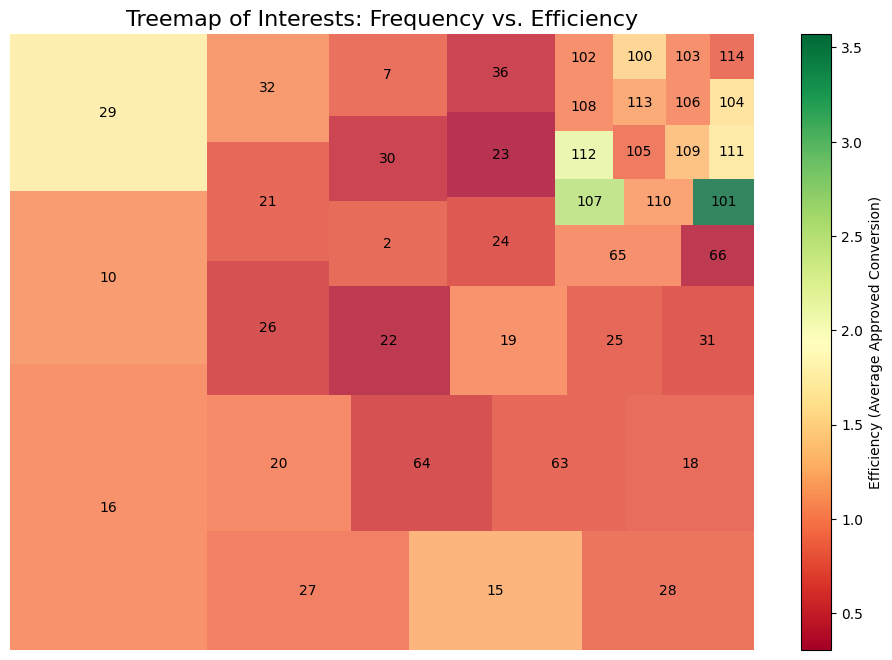

In [15]:
import squarify
import matplotlib.cm as cm
import matplotlib.pyplot as plt


# Calculate the frequency of each interest group
interest_frequency = df['interest'].value_counts()

# Calculate the average Approved_Conversion for each interest group
interest_efficiency = df.groupby('interest', observed=False)['Approved_Conversion'].mean()

# Calculate the average Spent for each interest group
average_spent = df.groupby('interest', observed=False)['Spent'].mean()

# Combine the frequency, efficiency, and average spent into a single DataFrame
interest_analysis_df = pd.DataFrame({
    'Frequency': interest_frequency,
    'Efficiency': interest_efficiency,
    'Average_Spent': average_spent
})

# Ensure both series have the same index (all interest levels)
interest_analysis_df = interest_analysis_df.reindex(interest_frequency.index)

# Use 'Frequency' for size and 'Efficiency' for color
sizes = interest_analysis_df['Frequency']
colors = interest_analysis_df['Efficiency']
labels = interest_analysis_df.index

# Normalize colors for the colormap
norm = plt.Normalize(colors.min(), colors.max())
cmap = cm.RdYlGn # Red-Yellow-Green colormap

# Create a figure and axes
fig, ax = plt.subplots(1, figsize=(12, 8))

# Create the treemap and store the result
# We don't strictly need to store the result of squarify.plot for the colorbar in this case
squarify.plot(sizes=sizes, label=labels, color=cmap(norm(colors)), alpha=0.8, text_kwargs={'fontsize':10, 'color':'black'}, ax=ax)

# Add a color bar using the figure and the ScalarMappable object
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]) # Needed for matplotlib < 3.1, doesn't hurt otherwise
fig.colorbar(sm, ax=ax, label='Efficiency (Average Approved Conversion)') # Pass the ScalarMappable object

plt.title('Treemap of Interests: Frequency vs. Efficiency', fontsize=16)
plt.axis('off') # Hide the axes
plt.show()

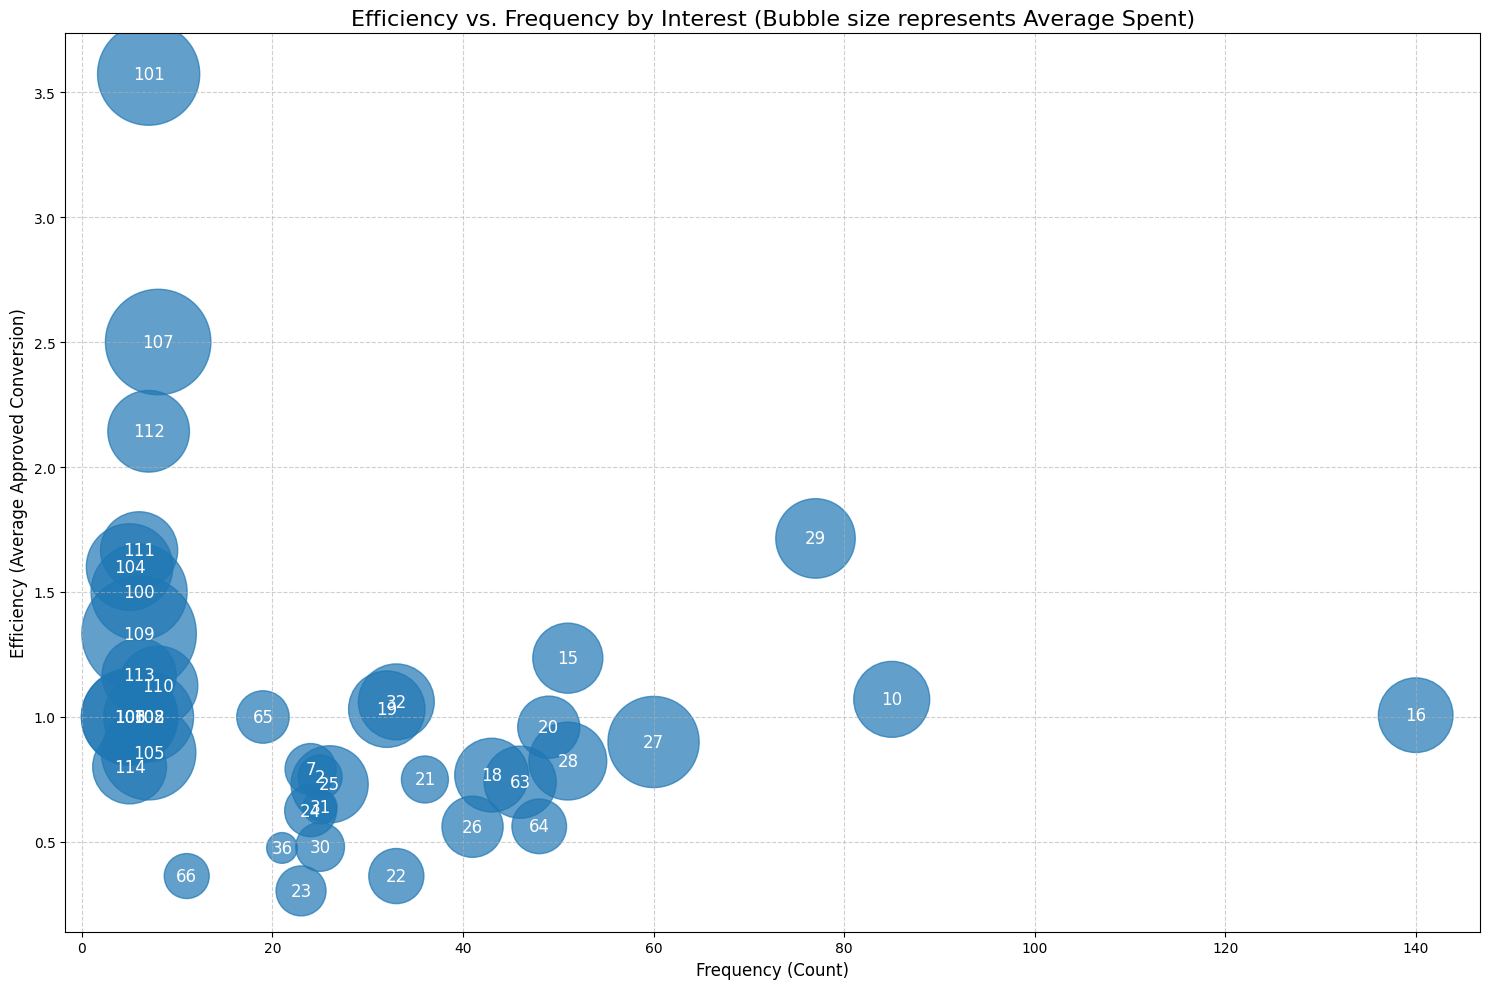

In [16]:
# Create the scatter plot
plt.figure(figsize=(15, 10))
# Use Average_Spent for size, scale it for better visualization
scatter = plt.scatter(interest_analysis_df['Frequency'], interest_analysis_df['Efficiency'],
                      s=interest_analysis_df['Average_Spent'] * 50, # Scale factor for bubble size
                      alpha=0.7)

# Add labels to each point
for i, interest_id in enumerate(interest_analysis_df.index):
    plt.text(interest_analysis_df['Frequency'].iloc[i], interest_analysis_df['Efficiency'].iloc[i], str(interest_id),
             fontsize=12, ha='center', va='center', color='white') # Changed color to black and vertical alignment to bottom

# Add title and labels
plt.title('Efficiency vs. Frequency by Interest (Bubble size represents Average Spent)', fontsize=16)
plt.xlabel('Frequency (Count)', fontsize=12)
plt.ylabel('Efficiency (Average Approved Conversion)', fontsize=12)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Target: ROI or conversion ? The zero-value cases

In [17]:
# Condition 1: spent = 0 and approved_conversion = 0
print("Row(s) where Spent = 0 and Approved_Conversion = 0:")
condition1_df = df[(df['Spent'] == 0) & (df['Approved_Conversion'] == 0)]
if not condition1_df.empty:
    display(condition1_df.head(1))
else:
    print("No rows found for this condition.")

print("\n" + "="*30 + "\n")

# Condition 2: spent = 0 and approved_conversion > 0
print("Row(s) where Spent = 0 and Approved_Conversion > 0:")
condition2_df = df[(df['Spent'] == 0) & (df['Approved_Conversion'] > 0)]
if not condition2_df.empty:
    display(condition2_df.head(1))
else:
    print("No rows found for this condition.")

print("\n" + "="*30 + "\n")

# Condition 3: spent > 0 and approved_conversion = 0
print("Row(s) where Spent > 0 and Approved_Conversion = 0:")
condition3_df = df[(df['Spent'] > 0) & (df['Approved_Conversion'] == 0)]
if not condition3_df.empty:
    display(condition3_df.head(1))
else:
    print("No rows found for this condition.")

print("\n" + "="*30 + "\n")

# Condition 4: spent > 0 and approved_conversion > 0
print("Row(s) where Spent > 0 and Approved_Conversion > 0:")
condition4_df = df[(df['Spent'] > 0) & (df['Approved_Conversion'] > 0)]
if not condition4_df.empty:
    display(condition4_df.head(1))
else:
    print("No rows found for this condition.")

Row(s) where Spent = 0 and Approved_Conversion = 0:


,xyz_campaign_id,fb_campaign_id,age,gender,interest,Spent,Approved_Conversion
2,916,103920,30-34,M,20,0.0,0




Row(s) where Spent = 0 and Approved_Conversion > 0:


,xyz_campaign_id,fb_campaign_id,age,gender,interest,Spent,Approved_Conversion
5,916,103929,30-34,M,29,0.0,1




Row(s) where Spent > 0 and Approved_Conversion = 0:


,xyz_campaign_id,fb_campaign_id,age,gender,interest,Spent,Approved_Conversion
1,916,103917,30-34,M,16,1.82,0




Row(s) where Spent > 0 and Approved_Conversion > 0:


,xyz_campaign_id,fb_campaign_id,age,gender,interest,Spent,Approved_Conversion
0,916,103916,30-34,M,15,1.43,1


In [18]:
# Calculate the percentage of rows where 'Spent' is 0
spent_zero_percentage = (df['Spent'] == 0).mean() * 100

# Calculate the percentage of rows where 'Approved_Conversion' is 0
approved_conversion_zero_percentage = (df['Approved_Conversion'] == 0).mean() * 100

print(f"Percentage of rows where Spent = 0: {spent_zero_percentage:.0f}%")
print(f"Percentage of rows where Approved_Conversion = 0: {approved_conversion_zero_percentage:.0f}%")

Percentage of rows where Spent = 0: 18%
Percentage of rows where Approved_Conversion = 0: 49%


In [19]:
# Add a new column 'Spent_Conversion_Ratio' to df
# Calculate the ratio Spent/Approved_conversion, handle division by zero by setting the ratio to 0
df['Spent_on_Conversion_Ratio'] = df.apply(lambda row: row['Spent'] / row['Approved_Conversion'] if row['Approved_Conversion'] != 0 else 0, axis=1)

# Display the first few rows with the new column
print("DataFrame with 'Spent_Conversion_Ratio':")
display(df.head())

DataFrame with 'Spent_Conversion_Ratio':


,xyz_campaign_id,fb_campaign_id,age,gender,interest,Spent,Approved_Conversion,Spent_on_Conversion_Ratio
0,916,103916,30-34,M,15,1.43,1,1.43
1,916,103917,30-34,M,16,1.82,0,0.00
2,916,103920,30-34,M,20,0.00,0,0.00
3,916,103928,30-34,M,28,1.25,0,0.00
4,916,103928,30-34,M,28,1.29,1,1.29


# Splitting the data set and defining the targets

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import numpy as np

# Define features (X) and targets (y)
features = df[['age', 'gender', 'interest', 'Spent']]
target_approved = df['Approved_Conversion']
target_ratio = df['Spent_on_Conversion_Ratio']

# Reset the index of the features DataFrame
features = features.reset_index(drop=True)

# Define categorical and numerical features for the ColumnTransformer
categorical_features = ['age', 'gender', 'interest']
numerical_features = ['Spent']

# Create a ColumnTransformer to apply OneHotEncoder to categorical features
# Use sparse_output=False to get a dense array output
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough' # Keep numerical features as they are
)

# Apply the preprocessor to the features
features_processed = preprocessor.fit_transform(features)

# Get the feature names after one-hot encoding and from the passthrough
encoded_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_features)
passthrough_feature_names = numerical_features # 'Spent' is passed through

# Combine all feature names
all_feature_names = list(encoded_feature_names) + passthrough_feature_names

# Convert the processed features to a DataFrame
features_processed_df = pd.DataFrame(features_processed, columns=all_feature_names)

print("Final features (first 5 rows):")
display(features_processed_df.head())

Final features (first 5 rows):


,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M,interest_2,interest_7,interest_10,interest_15,...,interest_106,interest_107,interest_108,interest_109,interest_110,interest_111,interest_112,interest_113,interest_114,Spent
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.43
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.82
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.25
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.29


In [21]:
# Split the data for the 'Approved_Conversion' target
X_train_approved, X_test_approved, y_train_approved, y_test_approved = train_test_split(
    features_processed, target_approved, test_size=0.2, random_state=42
)

# Split the data for the 'Spent_on_Conversion_Ratio' target
X_train_ratio, X_test_ratio, y_train_ratio, y_test_ratio = train_test_split(
    features_processed, target_ratio, test_size=0.2, random_state=42
)

print("\nShapes of the split data:")
print(f"X_train_approved: {X_train_approved.shape}")
print(f"X_test_approved: {X_test_approved.shape}")
print(f"y_train_approved: {y_train_approved.shape}")
print(f"y_test_approved: {y_test_approved.shape}")
print(f"X_train_ratio: {X_train_ratio.shape}")
print(f"X_test_ratio: {X_test_ratio.shape}")
print(f"y_train_ratio: {y_train_ratio.shape}")
print(f"y_test_ratio: {y_test_ratio.shape}")


Shapes of the split data:
X_train_approved: (914, 47)
X_test_approved: (229, 47)
y_train_approved: (914,)
y_test_approved: (229,)
X_train_ratio: (914, 47)
X_test_ratio: (229, 47)
y_train_ratio: (914,)
y_test_ratio: (229,)


- Split the data set between train and test for two targets (approved and ratio)
- Pipeline with one-hot encoding
=> done

- ML models and metrics (for each two targets with MLflow ?)
- Comparaison
- If necessary, dropping some interest values and retrain (linear)
- If necessary final comparaison
- Function and graph which display the max of the amount spent to optimize the ratio or the approved_conversion on a given segment

# Task
Generate Python code to train and evaluate a `MultiOutputRegressor` with a `DummyRegressor` and a `LinearRegression` model on the provided data. Log the training process and results for both models using MLflow, including parameters and evaluation metrics (MAE, MSE, R²) for both targets (`target_approved` and `target_ratio`). The primary tuning metric for future steps will be the R² of `spent_on_conversion_ratio`.

## Setup mlflow

### Subtask:
Install and configure MLflow for experiment tracking.


**Reasoning**:
Install the mlflow library using pip.



**Reasoning**:
Import the mlflow library and set the tracking URI to a local directory.



In [ ]:
import mlflow
mlflow.set_tracking_uri("mlruns")

## 1. Dummy regressor

### Subtask:
Train and evaluate a `MultiOutputRegressor` with a `DummyRegressor` as the baseline model, logging results with MLflow.


**Reasoning**:
Train and evaluate a Dummy Regressor model for both targets and log the metrics using MLflow.



In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Start an MLflow run for the Dummy Regressor
with mlflow.start_run(run_name="Dummy Regressor Baseline"):
    # Log the model parameters
    mlflow.log_param("strategy", "mean")

    # Initialize the MultiOutputRegressor with a DummyRegressor
    dummy_regressor = MultiOutputRegressor(DummyRegressor(strategy="mean"))

    # Combine the target variables for training
    y_train = np.column_stack((y_train_approved, y_train_ratio))
    y_test = np.column_stack((y_test_approved, y_test_ratio))

    # Train the model
    dummy_regressor.fit(X_train_approved, y_train)

    # Make predictions
    y_pred = dummy_regressor.predict(X_test_approved)

    # Calculate and log metrics for Approved_Conversion
    mae_approved = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
    mse_approved = mean_squared_error(y_test[:, 0], y_pred[:, 0])
    r2_approved = r2_score(y_test[:, 0], y_pred[:, 0])

    mlflow.log_metric("approved_conversion_mae", mae_approved)
    mlflow.log_metric("approved_conversion_mse", mse_approved)
    mlflow.log_metric("approved_conversion_r2", r2_approved)

    print(f"Approved_Conversion Metrics:")
    print(f"  MAE: {mae_approved:.4f}")
    print(f"  MSE: {mse_approved:.4f}")
    print(f"  R2: {r2_approved:.4f}")

    # Calculate and log metrics for Spent_on_Conversion_Ratio
    mae_ratio = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
    mse_ratio = mean_squared_error(y_test[:, 1], y_pred[:, 1])
    r2_ratio = r2_score(y_test[:, 1], y_pred[:, 1])

    mlflow.log_metric("spent_on_conversion_ratio_mae", mae_ratio)
    mlflow.log_metric("spent_on_conversion_ratio_mse", mse_ratio)
    mlflow.log_metric("spent_on_conversion_ratio_r2", r2_ratio)

    print(f"Spent_on_Conversion_Ratio Metrics:")
    print(f"  MAE: {mae_ratio:.4f}")
    print(f"  MSE: {mse_ratio:.4f}")
    print(f"  R2: {r2_ratio:.4f}")

    # Visualize predictions vs. actual values for Approved_Conversion
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test[:, 0], y_pred[:, 0], alpha=0.5)
    plt.plot([y_test[:, 0].min(), y_test[:, 0].max()], [y_test[:, 0].min(), y_test[:, 0].max()], 'k--', lw=2) # Diagonal line for perfect predictions
    plt.xlabel("Actual Approved Conversion")
    plt.ylabel("Predicted Approved Conversion")
    plt.title("Dummy Regressor: Actual vs. Predicted Approved Conversion")
    plt.grid(True)
    plt.show()

    # Visualize predictions vs. actual values for Spent_on_Conversion_Ratio
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test[:, 1], y_pred[:, 1], alpha=0.5)
    plt.plot([y_test[:, 1].min(), y_test[:, 1].max()], [y_test[:, 1].min(), y_test[:, 1].max()], 'k--', lw=2) # Diagonal line for perfect predictions
    plt.xlabel("Actual Spent on Conversion Ratio")
    plt.ylabel("Predicted Spent on Conversion Ratio")
    plt.title("Dummy Regressor: Actual vs. Predicted Spent on Conversion Ratio")
    plt.grid(True)
    plt.show()


# The MLflow run is automatically ended when exiting the 'with' block

## 2. Linear regression

### Subtask:
Train and evaluate a `LinearRegression` model, logging results with MLflow.


**Reasoning**:
Train and evaluate a Linear Regression model, logging results with MLflow, including parameters and evaluation metrics (MAE, MSE, R²) for both targets.



In [ ]:
from sklearn.linear_model import LinearRegression

# Start an MLflow run for the Linear Regression model
with mlflow.start_run(run_name="Linear Regression"):
    # Initialize the MultiOutputRegressor with a LinearRegression model
    linear_regressor = MultiOutputRegressor(LinearRegression())

    # Train the model using the combined target training data
    linear_regressor.fit(X_train_approved, y_train)

    # Make predictions on the test data
    y_pred = linear_regressor.predict(X_test_approved)

    # Calculate and log metrics for Approved_Conversion
    mae_approved = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
    mse_approved = mean_squared_error(y_test[:, 0], y_pred[:, 0])
    r2_approved = r2_score(y_test[:, 0], y_pred[:, 0])

    mlflow.log_metric("approved_conversion_mae", mae_approved)
    mlflow.log_metric("approved_conversion_mse", mse_approved)
    mlflow.log_metric("approved_conversion_r2", r2_approved)

    print(f"Approved_Conversion Metrics (Linear Regression):")
    print(f"  MAE: {mae_approved:.4f}")
    print(f"  MSE: {mse_approved:.4f}")
    print(f"  R2: {r2_approved:.4f}")

    # Calculate and log metrics for Spent_on_Conversion_Ratio
    mae_ratio = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
    mse_ratio = mean_squared_error(y_test[:, 1], y_pred[:, 1])
    r2_ratio = r2_score(y_test[:, 1], y_pred[:, 1])

    mlflow.log_metric("spent_on_conversion_ratio_mae", mae_ratio)
    mlflow.log_metric("spent_on_conversion_ratio_mse", mse_ratio)
    mlflow.log_metric("spent_on_conversion_ratio_r2", r2_ratio)

    print(f"Spent_on_Conversion_Ratio Metrics (Linear Regression):")
    print(f"  MAE: {mae_ratio:.4f}")
    print(f"  MSE: {mse_ratio:.4f}")
    print(f"  R2: {r2_ratio:.4f}")

    # Visualize predictions vs. actual values for Approved_Conversion
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test[:, 0], y_pred[:, 0], alpha=0.5)
    plt.plot([y_test[:, 0].min(), y_test[:, 0].max()], [y_test[:, 0].min(), y_test[:, 0].max()], 'k--', lw=2) # Diagonal line for perfect predictions
    plt.xlabel("Actual Approved Conversion")
    plt.ylabel("Predicted Approved Conversion")
    plt.title("Linear Regression: Actual vs. Predicted Approved Conversion")
    plt.grid(True)
    plt.show()

    # Visualize predictions vs. actual values for Spent_on_Conversion_Ratio
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test[:, 1], y_pred[:, 1], alpha=0.5)
    plt.plot([y_test[:, 1].min(), y_test[:, 1].max()], [y_test[:, 1].min(), y_test[:, 1].max()], 'k--', lw=2) # Diagonal line for perfect predictions
    plt.xlabel("Actual Spent on Conversion Ratio")
    plt.ylabel("Predicted Spent on Conversion Ratio")
    plt.title("Linear Regression: Actual vs. Predicted Spent on Conversion Ratio")
    plt.grid(True)
    plt.show()

## 2.2. Linear regression - Lasso

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mlflow

# Start an MLflow run for the Lasso Regression model
with mlflow.start_run(run_name="Lasso Regression"):
    # Define and log model parameters (you can tune these later)
    alpha_param = 1.0  # Default alpha for Lasso
    mlflow.log_param("alpha", alpha_param)

    # Initialize the MultiOutputRegressor with a Lasso model
    lasso_regressor = MultiOutputRegressor(Lasso(alpha=alpha_param, random_state=42)) # Use MultiOutputRegressor for Lasso

    # Train the model using the combined target training data
    # Note: We use X_train_approved here as the features are the same for both targets
    lasso_regressor.fit(X_train_approved, y_train)

    # Make predictions on the test data
    y_pred = lasso_regressor.predict(X_test_approved)

    # Calculate and log metrics for Approved_Conversion
    mae_approved = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
    mse_approved = mean_squared_error(y_test[:, 0], y_pred[:, 0])
    r2_approved = r2_score(y_test[:, 0], y_pred[:, 0])

    mlflow.log_metric("approved_conversion_mae", mae_approved)
    mlflow.log_metric("approved_conversion_mse", mse_approved)
    mlflow.log_metric("approved_conversion_r2", r2_approved)

    print(f"Approved_Conversion Metrics (Lasso Regression):")
    print(f"  MAE: {mae_approved:.4f}")
    print(f"  MSE: {mse_approved:.4f}")
    print(f"  R2: {r2_approved:.4f}")

    # Calculate and log metrics for Spent_on_Conversion_Ratio
    mae_ratio = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
    mse_ratio = mean_squared_error(y_test[:, 1], y_pred[:, 1])
    r2_ratio = r2_score(y_test[:, 1], y_pred[:, 1])

    mlflow.log_metric("spent_on_conversion_ratio_mae", mae_ratio)
    mlflow.log_metric("spent_on_conversion_ratio_mse", mse_ratio)
    mlflow.log_metric("spent_on_conversion_ratio_r2", r2_ratio)

    print(f"Spent_on_Conversion_Ratio Metrics (Lasso Regression):")
    print(f"  MAE: {mae_ratio:.4f}")
    print(f"  MSE: {mse_ratio:.4f}")
    print(f"  R2: {r2_ratio:.4f}")

    # Display the learned weights for each target
    print("\nLearned Weights for Approved_Conversion:")
    print(lasso_regressor.estimators_[0].coef_)
    print("\nLearned Weights for Spent_on_Conversion_Ratio:")
    print(lasso_regressor.estimators_[1].coef_)


    # Visualize predictions vs. actual values for Approved_Conversion
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test[:, 0], y_pred[:, 0], alpha=0.5)
    plt.plot([y_test[:, 0].min(), y_test[:, 0].max()], [y_test[:, 0].min(), y_test[:, 0].max()], 'k--', lw=2) # Diagonal line for perfect predictions
    plt.xlabel("Actual Approved Conversion")
    plt.ylabel("Predicted Approved Conversion")
    plt.title("Lasso Regression: Actual vs. Predicted Approved Conversion")
    plt.grid(True)
    plt.show()

    # Visualize predictions vs. actual values for Spent_on_Conversion_Ratio
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test[:, 1], y_pred[:, 1], alpha=0.5)
    plt.plot([y_test[:, 1].min(), y_test[:, 1].max()], [y_test[:, 1].min(), y_test[:, 1].max()], 'k--', lw=2) # Diagonal line for perfect predictions
    plt.xlabel("Actual Spent on Conversion Ratio")
    plt.ylabel("Predicted Spent on Conversion Ratio")
    plt.title("Lasso Regression: Actual vs. Predicted Spent on Conversion Ratio")
    plt.grid(True)
    plt.show()

# The MLflow run is automatically ended when exiting the 'with' block

## 3. Polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Start an MLflow run for the Polynomial Regression model
with mlflow.start_run(run_name="Polynomial Regression (Degree 2)"):
    # Log the model parameter
    mlflow.log_param("degree", 2)

    # Create a pipeline with PolynomialFeatures and LinearRegression
    polynomial_regressor = Pipeline([
        ('poly', PolynomialFeatures(degree=2)),
        ('linear', LinearRegression())
    ])

    # Train the model using the combined target training data
    # Note: We use X_train_approved here as the features are the same for both targets
    polynomial_regressor.fit(X_train_approved, y_train)

    # Make predictions on the test data
    y_pred = polynomial_regressor.predict(X_test_approved)

    # Calculate and log metrics for Approved_Conversion
    mae_approved = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
    mse_approved = mean_squared_error(y_test[:, 0], y_pred[:, 0])
    r2_approved = r2_score(y_test[:, 0], y_pred[:, 0])

    mlflow.log_metric("approved_conversion_mae", mae_approved)
    mlflow.log_metric("approved_conversion_mse", mse_approved)
    mlflow.log_metric("approved_conversion_r2", r2_approved)

    print(f"Approved_Conversion Metrics (Polynomial Regression Degree 2):")
    print(f"  MAE: {mae_approved:.4f}")
    print(f"  MSE: {mse_approved:.4f}")
    print(f"  R2: {r2_approved:.4f}")

    # Calculate and log metrics for Spent_on_Conversion_Ratio
    mae_ratio = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
    mse_ratio = mean_squared_error(y_test[:, 1], y_pred[:, 1])
    r2_ratio = r2_score(y_test[:, 1], y_pred[:, 1])

    mlflow.log_metric("spent_on_conversion_ratio_mae", mae_ratio)
    mlflow.log_metric("spent_on_conversion_ratio_mse", mse_ratio)
    mlflow.log_metric("spent_on_conversion_ratio_r2", r2_ratio)

    print(f"Spent_on_Conversion_Ratio Metrics (Polynomial Regression Degree 2):")
    print(f"  MAE: {mae_ratio:.4f}")
    print(f"  MSE: {mse_ratio:.4f}")
    print(f"  R2: {r2_ratio:.4f}")

    # Visualize predictions vs. actual values for Approved_Conversion
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test[:, 0], y_pred[:, 0], alpha=0.5)
    plt.plot([y_test[:, 0].min(), y_test[:, 0].max()], [y_test[:, 0].min(), y_test[:, 0].max()], 'k--', lw=2) # Diagonal line for perfect predictions
    plt.xlabel("Actual Approved Conversion")
    plt.ylabel("Predicted Approved Conversion")
    plt.title("Polynomial Regression (Degree 2): Actual vs. Predicted Approved Conversion")
    plt.grid(True)
    plt.show()

    # Visualize predictions vs. actual values for Spent_on_Conversion_Ratio
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test[:, 1], y_pred[:, 1], alpha=0.5)
    plt.plot([y_test[:, 1].min(), y_test[:, 1].max()], [y_test[:, 1].min(), y_test[:, 1].max()], 'k--', lw=2) # Diagonal line for perfect predictions
    plt.xlabel("Actual Spent on Conversion Ratio")
    plt.ylabel("Predicted Spent on Conversion Ratio")
    plt.title("Polynomial Regression (Degree 2): Actual vs. Predicted Spent on Conversion Ratio")
    plt.grid(True)
    plt.show()

# The MLflow run is automatically ended when exiting the 'with' block

## 4. Polynomial regression - Lasso

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mlflow

# Start an MLflow run for the Polynomial Regression with Lasso model
with mlflow.start_run(run_name="Polynomial Regression (Degree 2) with Lasso"):
    # Define and log model parameters (you can tune these later)
    alpha_param = 1.0  # Default alpha for Lasso
    mlflow.log_param("degree", 2)
    mlflow.log_param("alpha", alpha_param)

    # Create a pipeline with PolynomialFeatures and Lasso
    lasso_polynomial_regressor = Pipeline([
        ('poly', PolynomialFeatures(degree=2)),
        ('lasso', MultiOutputRegressor(Lasso(alpha=alpha_param, random_state=42))) # Use MultiOutputRegressor for Lasso
    ])

    # Train the model using the combined target training data
    # Note: We use X_train_approved here as the features are the same for both targets
    lasso_polynomial_regressor.fit(X_train_approved, y_train)

    # Make predictions on the test data
    y_pred = lasso_polynomial_regressor.predict(X_test_approved)

    # Calculate and log metrics for Approved_Conversion
    mae_approved = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
    mse_approved = mean_squared_error(y_test[:, 0], y_pred[:, 0])
    r2_approved = r2_score(y_test[:, 0], y_pred[:, 0])

    mlflow.log_metric("approved_conversion_mae", mae_approved)
    mlflow.log_metric("approved_conversion_mse", mse_approved)
    mlflow.log_metric("approved_conversion_r2", r2_approved)

    print(f"Approved_Conversion Metrics (Polynomial Regression Degree 2 with Lasso):")
    print(f"  MAE: {mae_approved:.4f}")
    print(f"  MSE: {mse_approved:.4f}")
    print(f"  R2: {r2_approved:.4f}")

    # Calculate and log metrics for Spent_on_Conversion_Ratio
    mae_ratio = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
    mse_ratio = mean_squared_error(y_test[:, 1], y_pred[:, 1])
    r2_ratio = r2_score(y_test[:, 1], y_pred[:, 1])

    mlflow.log_metric("spent_on_conversion_ratio_mae", mae_ratio)
    mlflow.log_metric("spent_on_conversion_ratio_mse", mse_ratio)
    mlflow.log_metric("spent_on_conversion_ratio_r2", r2_ratio)

    print(f"Spent_on_Conversion_Ratio Metrics (Polynomial Regression Degree 2 with Lasso):")
    print(f"  MAE: {mae_ratio:.4f}")
    print(f"  MSE: {mse_ratio:.4f}")
    print(f"  R2: {r2_ratio:.4f}")

    # Display the learned weights for each target
    print("\nLearned Weights for Approved_Conversion:")
    print(lasso_polynomial_regressor.named_steps['lasso'].estimators_[0].coef_)
    print("\nLearned Weights for Spent_on_Conversion_Ratio:")
    print(lasso_polynomial_regressor.named_steps['lasso'].estimators_[1].coef_)

    # Visualize predictions vs. actual values for Approved_Conversion
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test[:, 0], y_pred[:, 0], alpha=0.5)
    plt.plot([y_test[:, 0].min(), y_test[:, 0].max()], [y_test[:, 0].min(), y_test[:, 0].max()], 'k--', lw=2) # Diagonal line for perfect predictions
    plt.xlabel("Actual Approved Conversion")
    plt.ylabel("Predicted Approved Conversion")
    plt.title("Polynomial Regression (Degree 2) with Lasso: Actual vs. Predicted Approved Conversion")
    plt.grid(True)
    plt.show()

    # Visualize predictions vs. actual values for Spent_on_Conversion_Ratio
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test[:, 1], y_pred[:, 1], alpha=0.5)
    plt.plot([y_test[:, 1].min(), y_test[:, 1].max()], [y_test[:, 1].min(), y_test[:, 1].max()], 'k--', lw=2) # Diagonal line for perfect predictions
    plt.xlabel("Actual Spent on Conversion Ratio")
    plt.ylabel("Predicted Spent on Conversion Ratio")
    plt.title("Polynomial Regression (Degree 2) with Lasso: Actual vs. Predicted Spent on Conversion Ratio")
    plt.grid(True)
    plt.show()

# The MLflow run is automatically ended when exiting the 'with' block

## 5. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mlflow

# Start an MLflow run for the Decision Tree Regressor model
with mlflow.start_run(run_name="Decision Tree Regressor"):
    # Initialize the MultiOutputRegressor with a DecisionTreeRegressor
    # You can add parameters like max_depth, min_samples_split, etc. here for tuning later
    decision_tree_regressor = MultiOutputRegressor(DecisionTreeRegressor(random_state=42))

    # Train the model using the combined target training data
    # Note: We use X_train_approved here as the features are the same for both targets
    decision_tree_regressor.fit(X_train_approved, y_train)

    # Make predictions on the test data
    y_pred = decision_tree_regressor.predict(X_test_approved)

    # Calculate and log metrics for Approved_Conversion
    mae_approved = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
    mse_approved = mean_squared_error(y_test[:, 0], y_pred[:, 0])
    r2_approved = r2_score(y_test[:, 0], y_pred[:, 0])

    mlflow.log_metric("approved_conversion_mae", mae_approved)
    mlflow.log_metric("approved_conversion_mse", mse_approved)
    mlflow.log_metric("approved_conversion_r2", r2_approved)

    print(f"Approved_Conversion Metrics (Decision Tree Regressor):")
    print(f"  MAE: {mae_approved:.4f}")
    print(f"  MSE: {mse_approved:.4f}")
    print(f"  R2: {r2_approved:.4f}")

    # Calculate and log metrics for Spent_on_Conversion_Ratio
    mae_ratio = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
    mse_ratio = mean_squared_error(y_test[:, 1], y_pred[:, 1])
    r2_ratio = r2_score(y_test[:, 1], y_pred[:, 1])

    mlflow.log_metric("spent_on_conversion_ratio_mae", mae_ratio)
    mlflow.log_metric("spent_on_conversion_ratio_mse", mse_ratio)
    mlflow.log_metric("spent_on_conversion_ratio_r2", r2_ratio)

    print(f"Spent_on_Conversion_Ratio Metrics (Decision Tree Regressor):")
    print(f"  MAE: {mae_ratio:.4f}")
    print(f"  MSE: {mse_ratio:.4f}")
    print(f"  R2: {r2_ratio:.4f}")

    # Visualize predictions vs. actual values for Approved_Conversion
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test[:, 0], y_pred[:, 0], alpha=0.5)
    plt.plot([y_test[:, 0].min(), y_test[:, 0].max()], [y_test[:, 0].min(), y_test[:, 0].max()], 'k--', lw=2) # Diagonal line for perfect predictions
    plt.xlabel("Actual Approved Conversion")
    plt.ylabel("Predicted Approved Conversion")
    plt.title("Decision Tree Regressor: Actual vs. Predicted Approved Conversion")
    plt.grid(True)
    plt.show()

    # Visualize predictions vs. actual values for Spent_on_Conversion_Ratio
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test[:, 1], y_pred[:, 1], alpha=0.5)
    plt.plot([y_test[:, 1].min(), y_test[:, 1].max()], [y_test[:, 1].min(), y_test[:, 1].max()], 'k--', lw=2) # Diagonal line for perfect predictions
    plt.xlabel("Actual Spent on Conversion Ratio")
    plt.ylabel("Predicted Spent on Conversion Ratio")
    plt.title("Decision Tree Regressor: Actual vs. Predicted Spent on Conversion Ratio")
    plt.grid(True)
    plt.show()

# The MLflow run is automatically ended when exiting the 'with' block

## 6. Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mlflow

# Start an MLflow run for the Random Forest Regressor model
with mlflow.start_run(run_name="Random Forest Regressor"):
    # Initialize the MultiOutputRegressor with a RandomForestRegressor
    # You can add parameters like n_estimators, max_depth, etc. here for tuning later
    random_forest_regressor = MultiOutputRegressor(RandomForestRegressor(random_state=42))

    # Train the model using the combined target training data
    # Note: We use X_train_approved here as the features are the same for both targets
    random_forest_regressor.fit(X_train_approved, y_train)

    # Make predictions on the test data
    y_pred = random_forest_regressor.predict(X_test_approved)

    # Calculate and log metrics for Approved_Conversion
    mae_approved = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
    mse_approved = mean_squared_error(y_test[:, 0], y_pred[:, 0])
    r2_approved = r2_score(y_test[:, 0], y_pred[:, 0])

    mlflow.log_metric("approved_conversion_mae", mae_approved)
    mlflow.log_metric("approved_conversion_mse", mse_approved)
    mlflow.log_metric("approved_conversion_r2", r2_approved)

    print(f"Approved_Conversion Metrics (Random Forest Regressor):")
    print(f"  MAE: {mae_approved:.4f}")
    print(f"  MSE: {mse_approved:.4f}")
    print(f"  R2: {r2_approved:.4f}")

    # Calculate and log metrics for Spent_on_Conversion_Ratio
    mae_ratio = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
    mse_ratio = mean_squared_error(y_test[:, 1], y_pred[:, 1])
    r2_ratio = r2_score(y_test[:, 1], y_pred[:, 1])

    mlflow.log_metric("spent_on_conversion_ratio_mae", mae_ratio)
    mlflow.log_metric("spent_on_conversion_ratio_mse", mse_ratio)
    mlflow.log_metric("spent_on_conversion_ratio_r2", r2_ratio)

    print(f"Spent_on_Conversion_Ratio Metrics (Random Forest Regressor):")
    print(f"  MAE: {mae_ratio:.4f}")
    print(f"  MSE: {mse_ratio:.4f}")
    print(f"  R2: {r2_ratio:.4f}")

    # Visualize predictions vs. actual values for Approved_Conversion
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test[:, 0], y_pred[:, 0], alpha=0.5)
    plt.plot([y_test[:, 0].min(), y_test[:, 0].max()], [y_test[:, 0].min(), y_test[:, 0].max()], 'k--', lw=2) # Diagonal line for perfect predictions
    plt.xlabel("Actual Approved Conversion")
    plt.ylabel("Predicted Approved Conversion")
    plt.title("Random Forest Regressor: Actual vs. Predicted Approved Conversion")
    plt.grid(True)
    plt.show()

    # Visualize predictions vs. actual values for Spent_on_Conversion_Ratio
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test[:, 1], y_pred[:, 1], alpha=0.5)
    plt.plot([y_test[:, 1].min(), y_test[:, 1].max()], [y_test[:, 1].min(), y_test[:, 1].max()], 'k--', lw=2) # Diagonal line for perfect predictions
    plt.xlabel("Actual Spent on Conversion Ratio")
    plt.ylabel("Predicted Spent on Conversion Ratio")
    plt.title("Random Forest Regressor: Actual vs. Predicted Spent on Conversion Ratio")
    plt.grid(True)
    plt.show()

# The MLflow run is automatically ended when exiting the 'with' block

## 7. Gradient Boosting Tree

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mlflow

# Start an MLflow run for the Gradient Boosting Regressor model
with mlflow.start_run(run_name="Gradient Boosting Regressor"):
    # Initialize the MultiOutputRegressor with a GradientBoostingRegressor
    # You can add parameters like n_estimators, learning_rate, max_depth, etc. here for tuning later
    gradient_boosting_regressor = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))

    # Train the model using the combined target training data
    # Note: We use X_train_approved here as the features are the same for both targets
    gradient_boosting_regressor.fit(X_train_approved, y_train)

    # Make predictions on the test data
    y_pred = gradient_boosting_regressor.predict(X_test_approved)

    # Calculate and log metrics for Approved_Conversion
    mae_approved = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
    mse_approved = mean_squared_error(y_test[:, 0], y_pred[:, 0])
    r2_approved = r2_score(y_test[:, 0], y_pred[:, 0])

    mlflow.log_metric("approved_conversion_mae", mae_approved)
    mlflow.log_metric("approved_conversion_mse", mse_approved)
    mlflow.log_metric("approved_conversion_r2", r2_approved)

    print(f"Approved_Conversion Metrics (Gradient Boosting Regressor):")
    print(f"  MAE: {mae_approved:.4f}")
    print(f"  MSE: {mse_approved:.4f}")
    print(f"  R2: {r2_approved:.4f}")

    # Calculate and log metrics for Spent_on_Conversion_Ratio
    mae_ratio = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
    mse_ratio = mean_squared_error(y_test[:, 1], y_pred[:, 1])
    r2_ratio = r2_score(y_test[:, 1], y_pred[:, 1])

    mlflow.log_metric("spent_on_conversion_ratio_mae", mae_ratio)
    mlflow.log_metric("spent_on_conversion_ratio_mse", mse_ratio)
    mlflow.log_metric("spent_on_conversion_ratio_r2", r2_ratio)

    print(f"Spent_on_Conversion_Ratio Metrics (Gradient Boosting Regressor):")
    print(f"  MAE: {mae_ratio:.4f}")
    print(f"  MSE: {mse_ratio:.4f}")
    print(f"  R2: {r2_ratio:.4f}")


    # Visualize predictions vs. actual values for Approved_Conversion
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test[:, 0], y_pred[:, 0], alpha=0.5)
    plt.plot([y_test[:, 0].min(), y_test[:, 0].max()], [y_test[:, 0].min(), y_test[:, 0].max()], 'k--', lw=2) # Diagonal line for perfect predictions
    plt.xlabel("Actual Approved Conversion")
    plt.ylabel("Predicted Approved Conversion")
    plt.title("Gradient Boosting Regressor: Actual vs. Predicted Approved Conversion")
    plt.grid(True)
    plt.show()

    # Visualize predictions vs. actual values for Spent_on_Conversion_Ratio
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test[:, 1], y_pred[:, 1], alpha=0.5)
    plt.plot([y_test[:, 1].min(), y_test[:, 1].max()], [y_test[:, 1].min(), y_test[:, 1].max()], 'k--', lw=2) # Diagonal line for perfect predictions
    plt.xlabel("Actual Spent on Conversion Ratio")
    plt.ylabel("Predicted Spent on Conversion Ratio")
    plt.title("Gradient Boosting Regressor: Actual vs. Predicted Spent on Conversion Ratio")
    plt.grid(True)
    plt.show()

# The MLflow run is automatically ended when exiting the 'with' block

## 8. kNeighbor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mlflow

# Start an MLflow run for the KNeighbors Regressor model
with mlflow.start_run(run_name="KNeighbors Regressor"):
    # Initialize the MultiOutputRegressor with a KNeighborsRegressor
    # You can add parameters like n_neighbors, weights, algorithm, etc. here for tuning later
    kneighbors_regressor = MultiOutputRegressor(KNeighborsRegressor())

    # Train the model using the combined target training data
    # Note: We use X_train_approved here as the features are the same for both targets
    kneighbors_regressor.fit(X_train_approved, y_train)

    # Make predictions on the test data
    y_pred = kneighbors_regressor.predict(X_test_approved)

    # Calculate and log metrics for Approved_Conversion
    mae_approved = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
    mse_approved = mean_squared_error(y_test[:, 0], y_pred[:, 0])
    r2_approved = r2_score(y_test[:, 0], y_pred[:, 0])

    mlflow.log_metric("approved_conversion_mae", mae_approved)
    mlflow.log_metric("approved_conversion_mse", mse_approved)
    mlflow.log_metric("approved_conversion_r2", r2_approved)

    print(f"Approved_Conversion Metrics (KNeighbors Regressor):")
    print(f"  MAE: {mae_approved:.4f}")
    print(f"  MSE: {mse_approved:.4f}")
    print(f"  R2: {r2_approved:.4f}")

    # Calculate and log metrics for Spent_on_Conversion_Ratio
    mae_ratio = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
    mse_ratio = mean_squared_error(y_test[:, 1], y_pred[:, 1])
    r2_ratio = r2_score(y_test[:, 1], y_pred[:, 1])

    mlflow.log_metric("spent_on_conversion_ratio_mae", mae_ratio)
    mlflow.log_metric("spent_on_conversion_ratio_mse", mse_ratio)
    mlflow.log_metric("spent_on_conversion_ratio_r2", r2_ratio)

    print(f"Spent_on_Conversion_Ratio Metrics (KNeighbors Regressor):")
    print(f"  MAE: {mae_ratio:.4f}")
    print(f"  MSE: {mse_ratio:.4f}")
    print(f"  R2: {r2_ratio:.4f}")


    # Visualize predictions vs. actual values for Approved_Conversion
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test[:, 0], y_pred[:, 0], alpha=0.5)
    plt.plot([y_test[:, 0].min(), y_test[:, 0].max()], [y_test[:, 0].min(), y_test[:, 0].max()], 'k--', lw=2) # Diagonal line for perfect predictions
    plt.xlabel("Actual Approved Conversion")
    plt.ylabel("Predicted Approved Conversion")
    plt.title("KNeighbors Regressor: Actual vs. Predicted Approved Conversion")
    plt.grid(True)
    plt.show()

    # Visualize predictions vs. actual values for Spent_on_Conversion_Ratio
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test[:, 1], y_pred[:, 1], alpha=0.5)
    plt.plot([y_test[:, 1].min(), y_test[:, 1].max()], [y_test[:, 1].min(), y_test[:, 1].max()], 'k--', lw=2) # Diagonal line for perfect predictions
    plt.xlabel("Actual Spent on Conversion Ratio")
    plt.ylabel("Predicted Spent on Conversion Ratio")
    plt.title("KNeighbors Regressor: Actual vs. Predicted Spent on Conversion Ratio")
    plt.grid(True)
    plt.show()

# The MLflow run is automatically ended when exiting the 'with' block